<a href="https://colab.research.google.com/github/ANGELA-NYUTU/DSCore_IP_WK2/blob/main/Moringa_Data_Science_Core_W2_Independent_Project_2021_09_Angela_Nyutu_Python_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploratory Data Analysis on Financial Habits**

## **1. Defining the Question**

### **a) Specifying the Question**

> How we can predict which individuals are most likely to have or use a bank account and what are the key demographic factors that might drive individuals’ financial outcomes? 

### **b) Defining the Metric for Success**

This analysis will lead to identify factors that potentially contribute to the utilization of banking services in Kenya, Uganda,Rwanda and Tanzania

### **c) Understanding the context **

The dataset is in the CSV format collected between 2016 and 2018 in Kenya, Rwanda,Uganda and Tanzania. The dataset contains data collected from a sample of people recording various attributes e.g whether or not they have a bank account along side their demographic data
The dataset has 13 columns and 23,524 rows


### **d) Recording the Experimental Design**

**Resources:**
1.Python software including python libraries i.e pandas, numpy,seaborn and datetime
2. The Financial dataset in CSV format
3. GITHUB repository
4. Google Collaboratory notebook
Exploratory Data Analysis will be conducted


### **e) Data Relevance**

Data include demographic data that affects financial decisions including banking services utilization

## **2. Reading the Data**

In [1]:
#Importing python libraries to be used in the EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import scipy.stats as stats


In [2]:
# Loading the Data from the source i.e. csv
dfdef= pd.read_csv('/content/VariableDefinitions.csv')
#This dataset pprovides useful definitions that are required in order to understand the financial dataset below

In [3]:
dffinance= pd.read_csv('/content/Financial Dataset - 1.csv')

## **3. Checking the Data**

In [4]:
#Determining the number of records in columns and rows
dffinance.shape
#The ficancial dataset has 13 columns and 23,524 rows

(23524, 13)

In [5]:
# Previewing the top of the financial dataset
dffinance.head()
#It is observed that some column names have spelling mistakes and also do not have the same sequence e.g some column names state with lower cases and others uppercase
#Column names is one of the areas that will be targeted during dataset cleaning.

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [6]:
# Previewing the bottom of the dataset
dffinance.tail()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [7]:
# Checking whether each column has an appropriate datatype
dffinance.dtypes
#The dataset has appropriate data types that can be classified into categorical(nominal),and continuous data types

country                    object
year                        int64
uniqueid                   object
Has a Bank account         object
Type of Location           object
Cell Phone Access          object
household_size            float64
Respondent Age            float64
gender_of_respondent       object
The relathip with head     object
marital_status             object
Level of Educuation        object
Type of Job                object
dtype: object

## **4. External Data Source Validation**

[Link](https://rstudio-pubs-static.s3.amazonaws.com/182250_19977d0c5c06403fbad1e653850fc7c6.html).

## **5. Tidying the Dataset**

### **Checking and dealing with null values**

In [8]:
#Identifying missing values in the dataset
dffinance.isnull().any()

country                    True
year                      False
uniqueid                  False
Has a Bank account         True
Type of Location           True
Cell Phone Access          True
household_size             True
Respondent Age             True
gender_of_respondent       True
The relathip with head     True
marital_status             True
Level of Educuation        True
Type of Job                True
dtype: bool

In [9]:
#Replacing null values in the house hold size with the house hold mean other than dropping the null values
household_mean= dffinance['household_size'].mean()
dffinance['household_size'].fillna(household_mean, inplace= True)

In [10]:
#Replacing null values in the house hold size with the house hold mean other than dropping the null values which is most appropriate for numerical datatypes
dffinance['Respondent Age'].fillna(dffinance['Respondent Age'].mean(), inplace= True)

In [11]:
#Dropping rows that have null values in the categoical data
dffinance.dropna(how='all', inplace= True, axis=0)

In [12]:
dffinance.isnull().any()

country                    True
year                      False
uniqueid                  False
Has a Bank account         True
Type of Location           True
Cell Phone Access          True
household_size            False
Respondent Age            False
gender_of_respondent       True
The relathip with head     True
marital_status             True
Level of Educuation        True
Type of Job                True
dtype: bool

### **Identifying and cleaning duplicates **

In [13]:
dffinance.duplicated().any()

False

In [14]:
dffinance.drop_duplicates()
dffinance.shape

(23524, 13)

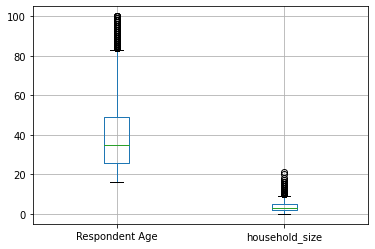

In [15]:
# Checking for Outliers in the numerical data
dffinance.boxplot(['Respondent Age', 'household_size',])
#Outliers in this case will not be remove to avoid massive data loss and because they are less than 5%of the whole dataset

In [16]:
Q1= dffinance['year'].quantile(0.25)
Q3=dffinance['year'].quantile(0.75)
IQR=Q3-Q1 
dffinances=(dffinance['year'] < (Q1 - 1.5 * IQR)) |(dffinance['year'] > (Q3 + 1.5 * IQR))
dffinances=dffinance[~((dffinance['year'] < (Q1 - 1.5 * IQR)) |(dffinance['year'] > (Q3 + 1.5 * IQR)))]


### **Correcting and removing unnecessary Column**

In [17]:
# Dropping unnecessary columns
dffinances.drop(['uniqueid'], axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [18]:
# Correcting column names to proper cases
dffinances.columns = dffinances.columns.str.strip().str.upper().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

In [19]:
# Correcting column names
dffinances.columns=['COUNTRY', 'YEAR', 'HAS_A_BANK_ACCOUNT', 'TYPE_OF_LOCATION','CELL_PHONE_ACCESS','HOUSEHOLD_SIZE','RESPONDENT_AGE', 'GENDER_OF_RESPONDENT', 'HOUSEHOLD_POSITION', 'MARITAL_STATUS', 'LEVEL_OF_EDUCUATION', 'TYPE_OF_JOB']

In [20]:
#Viewing the cleaned dataframe
dffinances.head()

,COUNTRY,YEAR,HAS_A_BANK_ACCOUNT,TYPE_OF_LOCATION,CELL_PHONE_ACCESS,HOUSEHOLD_SIZE,RESPONDENT_AGE,GENDER_OF_RESPONDENT,HOUSEHOLD_POSITION,MARITAL_STATUS,LEVEL_OF_EDUCUATION,TYPE_OF_JOB
0,Kenya,2018,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [21]:
dffinances.dtypes

COUNTRY                  object
YEAR                      int64
HAS_A_BANK_ACCOUNT       object
TYPE_OF_LOCATION         object
CELL_PHONE_ACCESS        object
HOUSEHOLD_SIZE          float64
RESPONDENT_AGE          float64
GENDER_OF_RESPONDENT     object
HOUSEHOLD_POSITION       object
MARITAL_STATUS           object
LEVEL_OF_EDUCUATION      object
TYPE_OF_JOB              object
dtype: object

## **6. Exploratory Data Analysis**

### **Univariant Analysis**

In [22]:
#Checking the measures of central tendency
dffinances[['HOUSEHOLD_SIZE','RESPONDENT_AGE']].describe()

,HOUSEHOLD_SIZE,RESPONDENT_AGE
count,23521.000000,23521.000000
mean,3.681735,38.805848
std,2.278666,16.508152
min,0.000000,16.000000
25%,2.000000,26.000000
50%,3.000000,35.000000
75%,5.000000,49.000000
max,21.000000,100.000000


In [23]:
dffinances[['HOUSEHOLD_SIZE','RESPONDENT_AGE']].mode()


,HOUSEHOLD_SIZE,RESPONDENT_AGE
0,2.0,30.0


In [24]:
dffinances.kurt()

YEAR             -1.605791
HOUSEHOLD_SIZE    1.163080
RESPONDENT_AGE    0.105420
dtype: float64

In [25]:
dffinances.var()

YEAR                0.717999
HOUSEHOLD_SIZE      5.192319
RESPONDENT_AGE    272.519076
dtype: float64

In [26]:
dffinances.groupby('COUNTRY').YEAR.value_counts().kurt()

1.8381043241118142

   HOUSEHOLD_SIZE  RESPONDENT_AGE
0             2.0            30.0


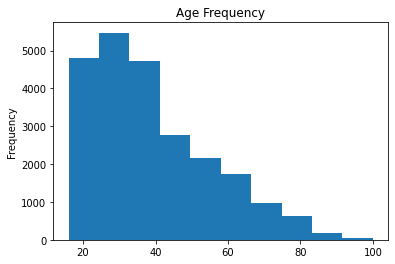

In [27]:

print(dffinances[['HOUSEHOLD_SIZE','RESPONDENT_AGE']].mode())

dffinances['RESPONDENT_AGE'].plot.hist(x =('NO.of people'), y=('Age'), title=('Age Frequency'))


In [28]:
df1= dffinances.groupby('COUNTRY').HAS_A_BANK_ACCOUNT.value_counts()
df1

COUNTRY   HAS_A_BANK_ACCOUNT
Kenya     No                    4546
          Yes                   1520
Rwanda    No                    7731
          Yes                   1003
Tanzania  No                    5966
          Yes                    604
Uganda    No                    1920
          Yes                    181
Name: HAS_A_BANK_ACCOUNT, dtype: int64

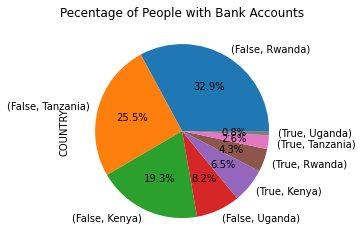

In [29]:
Has_account = dffinances['HAS_A_BANK_ACCOUNT'] == 'Yes'
df2= dffinances.groupby([Has_account]).COUNTRY.value_counts()
#Has_no_account = dffinances['HAS_A_BANK_ACCOUNT'] == 'No'
#df3= dffinances.groupby([Has_no_account]).COUNTRY.value_counts()
#fig,((ax1, ax2))=plt.subplots(2, figsize=(10,10))
df2.plot.pie(title= 'Pecentage of People with Bank Accounts',autopct='%.1f%%')
#df3.plot.pie(title= 'Pecentage of People without Bank Accounts',autopct='%.1f%%')

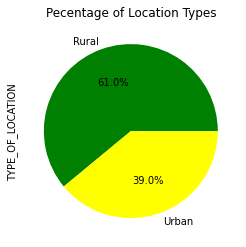

In [30]:
dflocation=dffinances['TYPE_OF_LOCATION'].value_counts()
dflocation.plot.pie(title= 'Pecentage of Location Types',label='TYPE_OF_LOCATION',autopct='%.1f%%', colors= ['Green', 'Yellow'])

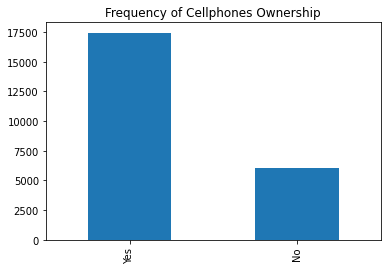

In [31]:
dflocation=dffinances['CELL_PHONE_ACCESS'].value_counts()
dflocation.plot.bar(x =('NO.of people with Cellphones'), y=('Cellphones'), title=('Frequency of Cellphones Ownership'))



/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


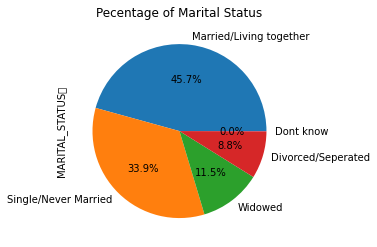

In [32]:
dfm=dffinances['MARITAL_STATUS'].value_counts()
dfm.plot.pie(title= 'Pecentage of Marital Status',label='MARITAL_STATUS	',autopct='%.1f%%')

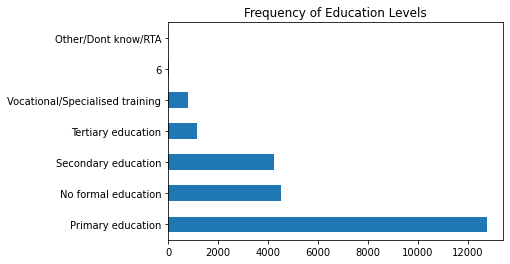

In [33]:
dfe=dffinances['LEVEL_OF_EDUCUATION'].value_counts()
dfe.plot.barh(x=('NO.of people'), y=('Education Level'),title=('Frequency of Education Levels'))


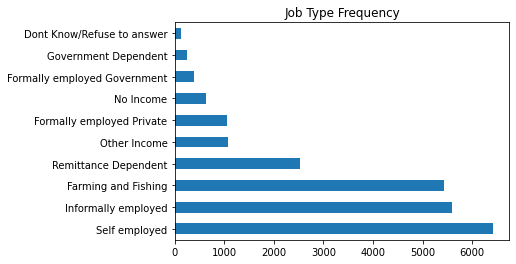

In [34]:
dfjob=dffinances['TYPE_OF_JOB'].value_counts()
dfjob.plot.barh(x =('NO.of people'), y=('Job Type'), title=('Job Type Frequency'))

**Univariant analysis summary**

1.

### **Bivariant Analysis**

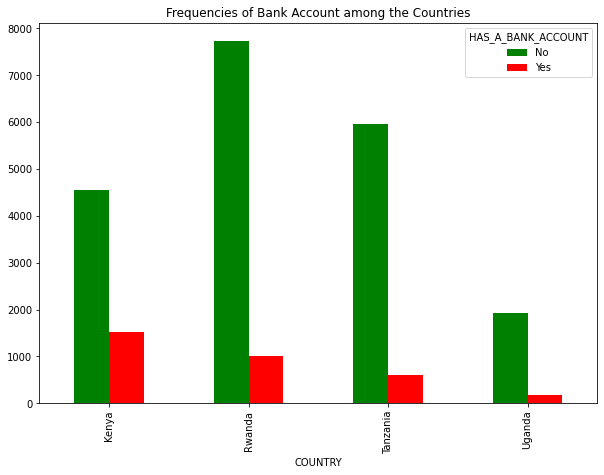

In [35]:
import datetime
dffinances.groupby(['COUNTRY','HAS_A_BANK_ACCOUNT']).YEAR.count().unstack().plot.bar(figsize=(10,7),color= ['green','red'], title=('Frequencies of Bank Account among the Countries'))



<function matplotlib.pyplot.show>

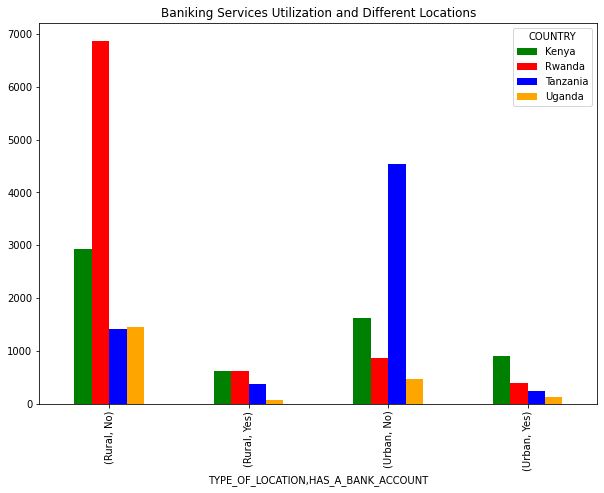

In [36]:

dffinances.groupby(['TYPE_OF_LOCATION','HAS_A_BANK_ACCOUNT','COUNTRY']).YEAR.count().unstack().plot.bar(figsize=(10,7),color= ['green','red','blue','orange'],title= ('Baniking Services Utilization and Different Locations'))
plt.xlabel=('Location Types')
plt.ylabel=('No. of People')
plt.show

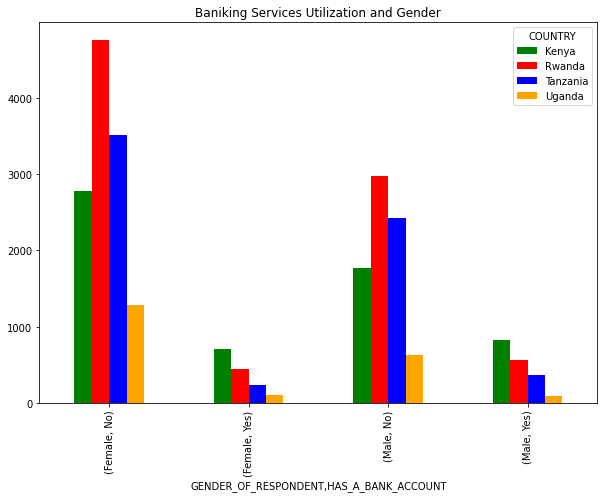

In [37]:
dffinances.groupby(['GENDER_OF_RESPONDENT','HAS_A_BANK_ACCOUNT','COUNTRY']).YEAR.count().unstack().plot.bar(figsize=(10,7),color= ['green','red','blue','orange'],title= ('Baniking Services Utilization and Gender'))


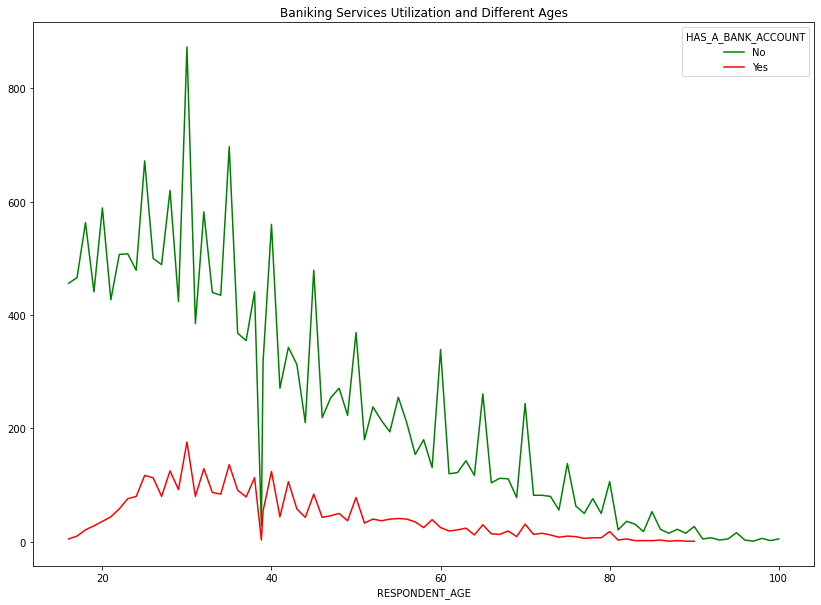

In [51]:
dffinances.groupby(['RESPONDENT_AGE','HAS_A_BANK_ACCOUNT']).YEAR.count().unstack().plot(figsize=(14,10),color= ['green','red'],title= ('Baniking Services Utilization and Different Ages'))

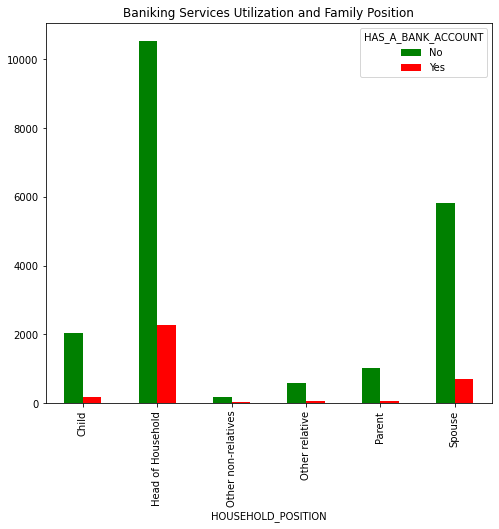

In [39]:
dffinances.groupby(['HOUSEHOLD_POSITION','HAS_A_BANK_ACCOUNT']).YEAR.count().unstack().plot.bar(figsize=(8,7),color= ['green','red'],title= ('Baniking Services Utilization and Family Position'))

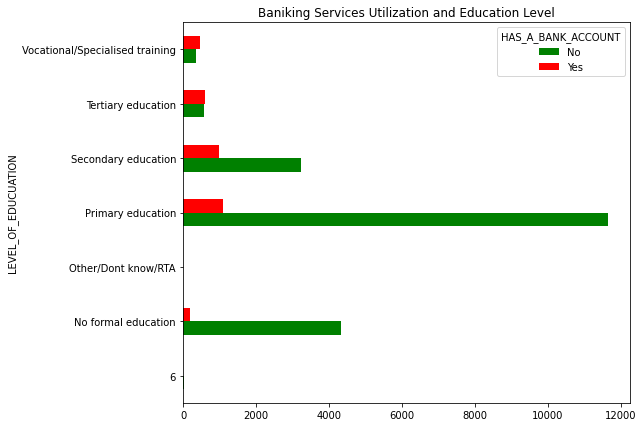

In [40]:
dffinances.groupby(['LEVEL_OF_EDUCUATION','HAS_A_BANK_ACCOUNT']).YEAR.count().unstack().plot.barh(figsize=(8,7),color= ['green','red'],title= ('Baniking Services Utilization and Education Level'))

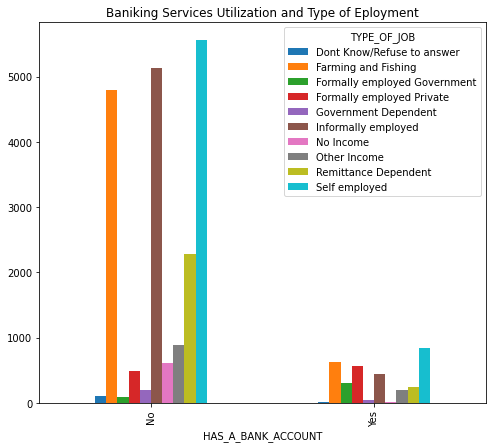

In [41]:
dffinances.groupby(['HAS_A_BANK_ACCOUNT','TYPE_OF_JOB']).COUNTRY.count().unstack().plot.bar(figsize=(8,7),title= ('Baniking Services Utilization and Type of Eployment'))

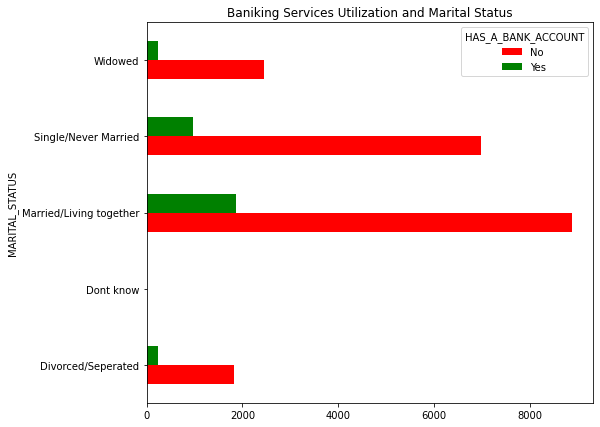

In [42]:
dffinances.groupby(['MARITAL_STATUS','HAS_A_BANK_ACCOUNT']).COUNTRY.count().unstack().plot.barh(figsize=(8,7),color= ['red','green'],title= ('Baniking Services Utilization and Marital Status'))

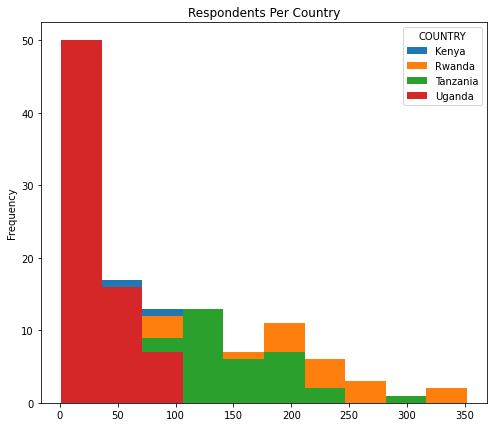

In [43]:
dffinances.groupby(['RESPONDENT_AGE','COUNTRY']).COUNTRY.count().unstack().plot.hist(bins= 10,figsize=(8,7),title= ('Respondents Per Country'))

<function matplotlib.pyplot.show>

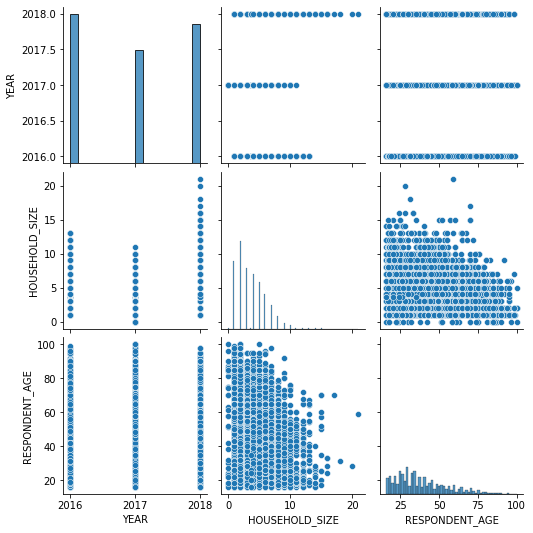

In [44]:
sns.pairplot(dffinances)
plt.show

### **Multivariant Analysis**

In [45]:
X = dffinances['RESPONDENT_AGE'].values
y = dffinances['RESPONDENT_AGE'].values

In [46]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [47]:

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

ValueError: ignored

In [ ]:

#

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)


In [ ]:



from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [ ]:

# 

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred)))



## **7. Implementing Solution**

In [48]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
dffinances['COUNTRY']=lb.fit_transform(dffinances['COUNTRY'].astype(str))
dffinances['TYPE_OF_LOCATION']=lb.fit_transform(dffinances['TYPE_OF_LOCATION'].astype(str))
dffinances['CELL_PHONE_ACCESS']=lb.fit_transform(dffinances['CELL_PHONE_ACCESS'].astype(str))
dffinances['GENDER_OF_RESPONDENT']=lb.fit_transform(dffinances['GENDER_OF_RESPONDENT'].astype(str))
dffinances[ 'MARITAL_STATUS']=lb.fit_transform(dffinances['MARITAL_STATUS'].astype(str))
dffinances['LEVEL_OF_EDUCUATION']=lb.fit_transform(dffinances['LEVEL_OF_EDUCUATION'].astype(str))
dffinances['TYPE_OF_JOB']=lb.fit_transform(dffinances['TYPE_OF_JOB'].astype(str))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

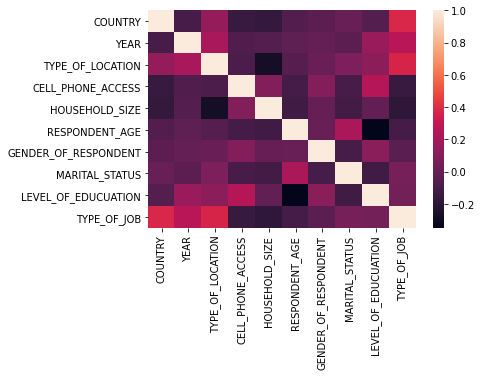

In [49]:
dfcorr= dffinances[['COUNTRY', 'YEAR', 'HAS_A_BANK_ACCOUNT', 'TYPE_OF_LOCATION','CELL_PHONE_ACCESS','HOUSEHOLD_SIZE','RESPONDENT_AGE', 'GENDER_OF_RESPONDENT', 'HOUSEHOLD_POSITION', 'MARITAL_STATUS', 'LEVEL_OF_EDUCUATION', 'TYPE_OF_JOB']]
sns.heatmap(dfcorr.corr(),annot=False)
plt.show()

### **Analysis Results** 
1.Rwanda had the highest number of respondents, followed by kenya, Tanzania then Uganda.
2.Mode age was 30. 
3.Age distribution of the respondents had a fairly normal  with only a skewness of 0.1

**Factors Influencing Bank Service Utilization**

1.Kenya is leads in the number of respondent who have bank accounts, followed by Rwanda,Tanzania then Uganda.
2. Most respondents who have bank accounts reside in the rural location type
3. men are the highest consummers of the the banking services.It is also noted that they are head of families.
4.people aged between 30-40 are among the highest consummers of banking services
5. Majority of consumers have at most a primary education
6.Being self employed, practicing farming were positively corrilated to having a bank account

## 8. Challenging the solution

# Reviewing the Solution 
Results sequence could have emanated from the fact the:
1. Respondents from the four countries were not fairly distributed by sample size and age.Uganda came last a result that could have been influenced by sample size
2.majority with bank accounts were from the rural location, the largest contributer to the sampla size
3. the self employed and farmers showed to have more bank accounts that any other job type. Data collected from the rural area being the majority could have led to the data skewing

## 9. Follow up questions

the right Question should have been, how are banking services utilized in the Rural and Urban locations



### a). **Did we have the right data?**

no

# b). **Do we need other data to answer our question?**

Yes.. from a more representative sample

### **c). Did we have the right question?**

yes